## Home Prices in Monroe Township, NJ (USA) Multivariate Linear Regression Model Project

#### From: Adish Shah
#### Inspired by [codebasics](https://www.youtube.com/c/codebasics)
#### Source: Stack Overflow

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## Uploading Dataset CSV file from Local

#### Note:
#### Make sure to choose the correct CSV file in this case -> homeprices.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving homeprices.csv to homeprices.csv


## Reading Dataset file and Creating Dataframe


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['homeprices.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


# Data Pre-processing 
### Fix the NaN value for the Second Index from the Dataframe
#### Note: 
#### Inserting the median value of bedrooms to the NaN slot of the Dataframe

In [ ]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [ ]:
df.bedrooms.fillna(median_bedrooms)

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

## Add the median value calculated to the Dataframe
#### Note: 
#### Median value was added in the NaN slot

In [ ]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


# Creating ML Model and Calculating Coefficients for each Feature and also Calculating Y-Intercept

In [ ]:
model = linear_model.LinearRegression()
model.fit(df[['area','bedrooms', 'age']], df.price)

LinearRegression()

In [ ]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
model.intercept_

221323.00186540396

## Predicting Output from Model Based on Random Input Data

In [ ]:
model.predict([[3000,3,40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [ ]:
model.predict([[2500,4,5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([578876.03748933])

## Double Checking Prediction Value with Inputs [[3000,3,40]] from Model

In [ ]:
(112.06244194*3000) + (23388.88007794*3) - (3231.71790863*40) + 221323.00186540396

498408.251574024

## Model Graph for each Feature Along with Scatter Graph of Data Points from given Dataset

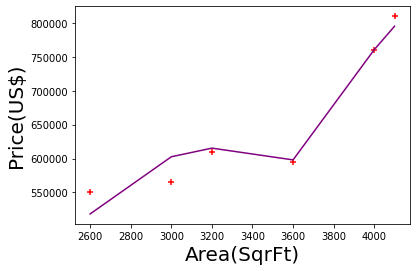

In [ ]:
%matplotlib inline
plt.xlabel("Area(SqrFt)", fontsize=20)
plt.ylabel("Price(US$)", fontsize=20)
plt.scatter(df.area, df.price, color="red", marker="+")
plt.plot(df.area,model.predict(df[['area','bedrooms','age']]), color="purple")

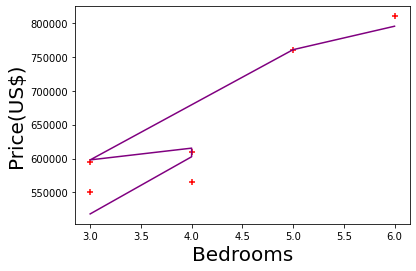

In [ ]:
%matplotlib inline
plt.xlabel("Bedrooms", fontsize=20)
plt.ylabel("Price(US$)", fontsize=20)
plt.scatter(df.bedrooms, df.price, color="red", marker="+")
plt.plot(df.bedrooms,model.predict(df[['area','bedrooms','age']]), color="purple")

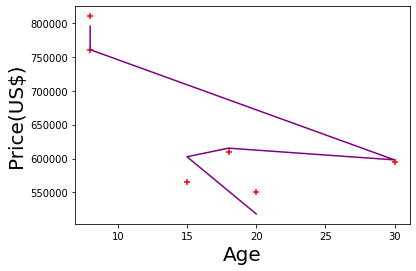

In [ ]:
%matplotlib inline
plt.xlabel("Age", fontsize=20)
plt.ylabel("Price(US$)", fontsize=20)
plt.scatter(df.age, df.price, color="red", marker="+")
plt.plot(df.age,model.predict(df[['area','bedrooms','age']]), color="purple")